# Решающие деревья

In [1]:
# Если медленно работает автодополнение в Jupyter Notebook, выполнить:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, plot_confusion_matrix, \
    plot_precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
# Создадим датафрейм:
df = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})
df

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
# Создадим решающее дерево:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [5]:
# В икс помещаем фичи:
X = df[['X_1', 'X_2']]

# В игрек помещаем поле, которое предсказываем:
y = df.Y

In [6]:
# Обучаем модель:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

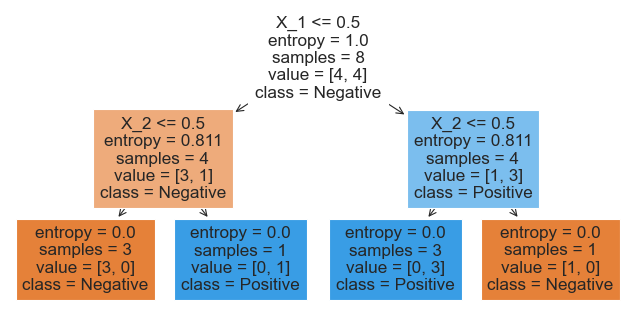

In [7]:
# Визуализируем решающее дерево:
plt.figure(figsize=(10, 5), dpi=80)
tree.plot_tree(clf, feature_names=X.columns, class_names=['Negative', 'Positive'] ,filled=True);

## Титаник

In [8]:
df = pd.read_csv(r'C:\Users\lubis\Downloads\train.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Haas, Miss. Aloisia",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
# Посчитаем количество пропущенных значений для каждой колонки:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Посмотрим процент пропущенных значений для каждой колонки:
df.isnull().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
y = df.Survived

In [15]:
# Дерево решений умеет работать только с числовыми переменными.
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
# Дерево решений не умеет работать с пропущенными значениями.
# Заполним пропущенные значения возраста медианным значением возраста:
X = X.fillna({'Age': X.Age.median()})

In [17]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Тренировочная и тестовая выборки

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
# Разобьем выборку на тренировочную и тестовую:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
X_train.shape

(596, 10)

In [21]:
X_test.shape

(295, 10)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
clf.score(X_train, y_train)

0.9798657718120806

In [24]:
clf.score(X_test, y_test)
# Разница в скорах большая, значит модель переобучилась.

0.7627118644067796

## Глубина дерева

In [25]:
# Ограничим глубину дерева:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [27]:
clf.score(X_train, y_train)

0.8489932885906041

In [28]:
# Количество правильных ответов на тесте стало больше:
clf.score(X_test, y_test)

0.8067796610169492

In [29]:
# Выясним, как ведут себя значения скоров для трейна и теста при разной глубине дерева:

scores = pd.DataFrame()

for max_depth in range(1, 16):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores = scores.append(temp)

scores.head()

,max_depth,train_score,test_score
0,1,0.788591,0.783051
0,2,0.788591,0.783051
0,3,0.825503,0.803390
0,4,0.843960,0.813559
0,5,0.848993,0.806780


In [30]:
scores = pd.melt(
    scores,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score'],
    var_name='type',
    value_name='score'
)
scores.head()

,max_depth,type,score
0,1,train_score,0.788591
1,2,train_score,0.788591
2,3,train_score,0.825503
3,4,train_score,0.843960
4,5,train_score,0.848993


<AxesSubplot:xlabel='max_depth', ylabel='score'>

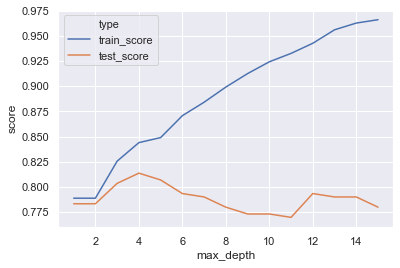

In [31]:
sns.lineplot(x='max_depth', y='score', hue='type', data=scores)

## Кроссвалидация

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [33]:
cross_val_score(clf, X_train, y_train, cv=5)
# 5 значений - это точность, которую показал классификатор, разбив X_train y_train на 5 равных кусочков
# сначала обучился на первых четырех и предсказал пятый
# потом обучился на всех, кроме 4-го и предсказал 4-й и т.д...

array([0.8       , 0.82352941, 0.77310924, 0.79831933, 0.85714286])

In [34]:
# Получим среднюю точность на кроссвалидации:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8104201680672268

In [35]:
# Добавим в скрипт кроссвалидацию:

scores = pd.DataFrame()

for max_depth in range(1, 16):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'mean_cross_val_score': [mean_cross_val_score],
    })
    scores = scores.append(temp)

scores.head()

,max_depth,train_score,test_score,mean_cross_val_score
0,1,0.788591,0.783051,0.788655
0,2,0.788591,0.783051,0.770168
0,3,0.825503,0.803390,0.805378
0,4,0.843960,0.813559,0.810420
0,5,0.848993,0.806780,0.785266


In [36]:
scores = pd.melt(
    scores,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'mean_cross_val_score'],
    var_name='type',
    value_name='score'
)
scores.head()

,max_depth,type,score
0,1,train_score,0.788591
1,2,train_score,0.788591
2,3,train_score,0.825503
3,4,train_score,0.843960
4,5,train_score,0.848993


<AxesSubplot:xlabel='max_depth', ylabel='score'>

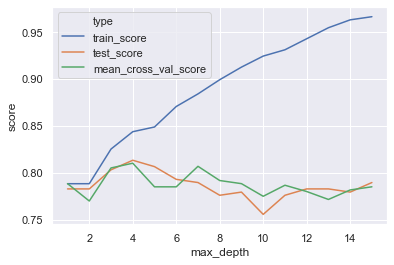

In [37]:
sns.lineplot(x='max_depth', y='score', hue='type', data=scores)

In [38]:
# Посмотрим глубину дерева, при которой достигается максимальное значение mean_cross_val_score:
scores.query("type == 'mean_cross_val_score'").sort_values('score', ascending=False).head(1)

,max_depth,type,score
33,4,mean_cross_val_score,0.81042


In [39]:
# На основе этой глубины заводим бест классифаир:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Обучим его на тренировочных данных:
best_clf.fit(X_train, y_train)

# Протестируем точность (процент правильных ответов):
best_clf.score(X_test, y_test)

0.8135593220338984

## Точность

In [40]:
# Точность хорошо работает только на выборках, у которых целевая переменная сбалансирована.

# Здесь же присутствует дисбаланс классов.
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
df.Survived.mean()
# 38.3% выжили в выборке.

0.3838383838383838

In [42]:
df.Survived.value_counts()[0] / (df.Survived.value_counts()[0] + df.Survived.value_counts()[1])
# 61.6% не выжили в выборке.

0.6161616161616161

In [43]:
# Классификатор, который будет тупо классифицировать ЛЮБОГО пассажира, как невыжившего, достигнет точности 61.6%.

## Метрики качества

In [44]:
# Pr (precision) - метрика, где ложно-положительные срабатывания (ложная тревога) отрицательно повлияют на коэф.
# или так называемые ошибки первого рода.

# Предсказываем выживших на титанике (True Positive).
# Например, в тестовой выборке предсказываем, что 100 чел выжили.
# Но на самом деле из этих 100 человек не выжили 20 (False Positive), т.е. мы ошиблись в 20 случаях.
# Это негативно повлияет на precision:
# Pr = 80 / (80 + 20) = 0.8

\begin{equation}
Pr = \frac{TP}{TP + FP}
\end{equation}

In [45]:
# R (recall) - метрика, где ложно-отрицательные срабатывания (пропуск цели) отрицательно повлияют на коэф.
# или так называемые ошибки второго рода.

# Опять предсказываем выживших на титанике (True Positive).
# Например, в тестовой выборке предсказываем, что 100 чел выжили. И это на самом деле оказалось так.
# Но мы не смогли правильно определить еще 20 выживших и отнесли из к невыжившим (False Negative).
# Это негативно повлияет на recall:
# R = 100 / (100 + 20) = 0.83

\begin{equation}
R = \frac{TP}{TP + FN}
\end{equation}

In [46]:
# Recall    - показывает, насколько достигнута цель (какой процент выживших удалось обнаружить).
# Precision - какую цену в виде ложных срабатываний за это заплатили.

## Подбор параметров

In [47]:
# На практике подбор параметров дерева не пишут руками, а используют GridSearchCV.

# Понадобится классификатор:
clf = tree.DecisionTreeClassifier(random_state=0)
clf

DecisionTreeClassifier(random_state=0)

In [48]:
# Словарь с параметрами классификатора, комбинации которых мы будем подбирать и проверять на кроссвалидации:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

# И укажем 5 фолдов для кроссвалидации:
grid_search_cv_clf = GridSearchCV(clf, params, cv=5)

In [49]:
# Обучаем на тренировочных данных:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [50]:
# Посмотрим параметры, для которых значение эккураси будет максимальным:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [51]:
# Получим лучший классификатор:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [52]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [53]:
# Предскажем погибших и выживших:
y_pred = best_clf.predict(X_test)

In [54]:
# Precision:
precision_score(y_test, y_pred)

0.7745098039215687

In [55]:
# Recall:
recall_score(y_test, y_pred)

0.7117117117117117

## Повышаем Precision - понижаем Recall, и наоборот

In [56]:
# Вероятность отнесения пассажира к тому или иному классу:
y_pred_prob = grid_search_cv_clf.predict_proba(X_test)
pd.DataFrame(y_pred_prob, columns=['Вероятность погибнуть', 'вероятность выжить']).head()

,Вероятность погибнуть,вероятность выжить
0,0.855814,0.144186
1,0.855814,0.144186
2,1.000000,0.000000
3,0.014706,0.985294
4,0.343750,0.656250


In [57]:
# По умолчанию вероятность отнесения к классу конвертируется по отсечке 0.5
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [58]:
# Отберем только вторую колонку, т.е. вероятность выжить:
pd.Series(y_pred_prob[:, 1]).head()

0    0.144186
1    0.144186
2    0.000000
3    0.985294
4    0.656250
dtype: float64

<AxesSubplot:>

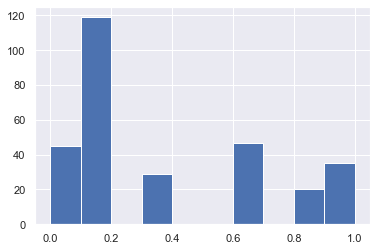

In [59]:
pd.Series(y_pred_prob[:, 1]).hist()

In [60]:
sorted(
    pd.Series(y_pred_prob[:, 1]).unique()
)

[0.0,
 0.05263157894736842,
 0.07692307692307693,
 0.10526315789473684,
 0.14418604651162792,
 0.3939393939393939,
 0.65625,
 0.8775510204081632,
 0.9852941176470589,
 1.0]

In [61]:
# Установим границу повыше на 0.8:
y_pred = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1])

In [62]:
# Precision стал больше:
precision_score(y_test, y_pred)

0.9636363636363636

In [63]:
# Recall стал меньше:
recall_score(y_test, y_pred)

0.4774774774774775

In [64]:
# Установим границу пониже:
y_pred = np.where(y_pred_prob[:, 1] > 0.1, 1, 0)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1])

In [65]:
# Precision стал меньше:
precision_score(y_test, y_pred)

0.416

In [66]:
# Recall стал больше:
recall_score(y_test, y_pred)

0.9369369369369369

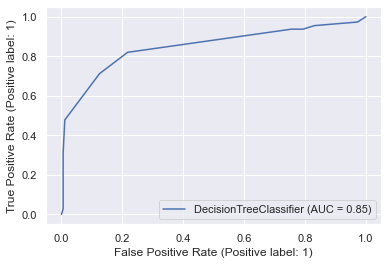

In [67]:
# Построим ROC-кривую:
plot_roc_curve(best_clf, X_test, y_test)

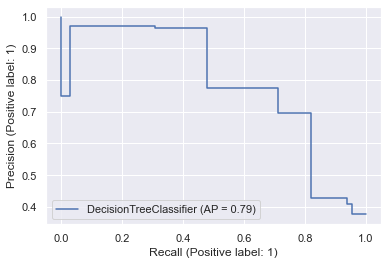

In [68]:
# Построим ROC-кривую по осям которой Precision и Recall:
plot_precision_recall_curve(best_clf, X_test, y_test)

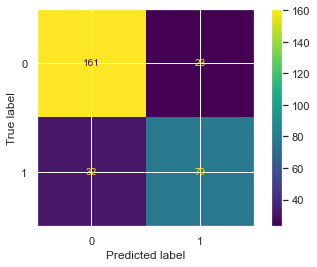

In [69]:
# Построим onfusion matrix:
plot_confusion_matrix(best_clf, X_test, y_test)